# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [101]:
def train(X, T, learning_rate, n_epochs, verbose=False):

    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X[:,:], axis=0)
    Tmeans = np.mean(T[:,:], axis=0)
    Xstds = np.std(X[:,:], axis=0)
    Tstds = np.std(T[:,:], axis=0)

    # Use the means and standard deviations to standardize X and T
    X = (X[:,:] - Xmeans) / Xstds
    T = (T[:,:] - Tmeans) / Tstds
#     X = (X - Xmeans) / Xstds
#     T = (T - Tmeans) / Tstds
    

    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X, 0, 1, axis = 1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    n_samples, n_inputs = X.shape
    w = np.zeros((n_inputs, 1))
    
    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            y = X[n:n + 1, :] @ w
            error = T[n:n + 1, :] - y
            w += learning_rate * X[n:n + 1, :].T * error
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [102]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds'] 
    #X[:, 1:] = (X[:, 1:] - Xmeans) / Xstds
    # Predict output values using weights in model
    
    X = np.insert(X, 0, 1, axis=1)
    prediction = X @ model['w']
    
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    prediction = prediction * model['Tstds'] + model['Tmeans']
    
    # Return the unstandardized output values
    return prediction

In [103]:
def rmse(A, B):
    return np.sqrt(np.mean((A-B)**2))

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

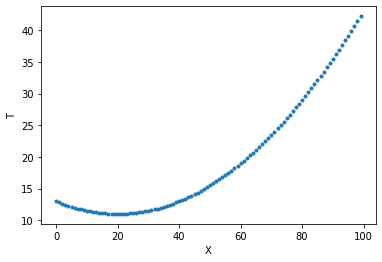

In [104]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [105]:
model = train(X, T, 0.01, 50, verbose=True)
model

print(rmse(X, T))

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40
36.42771379732744


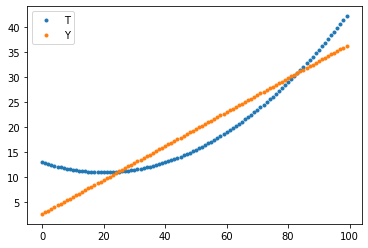

In [106]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

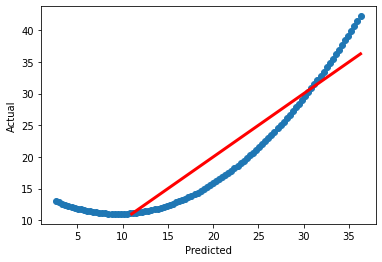

In [107]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)


## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [123]:
df = pandas.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')

## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [124]:
df.isna().sum()
df.shape

(365, 30)

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [125]:
df = df.dropna(axis=1)
df.isna().sum()
df.shape

(365, 24)

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [126]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [127]:
df = df[Xnames]
Ttemp = df[['tave']][1:]
T = Ttemp.to_numpy()
X = df.to_numpy()
X = X[:-1]

X.shape, T.shape

((364, 8), (364, 1))

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

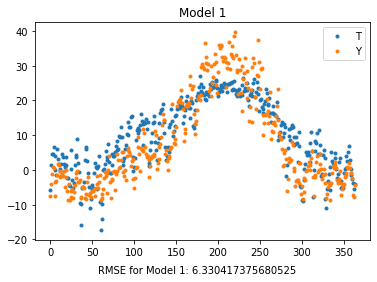

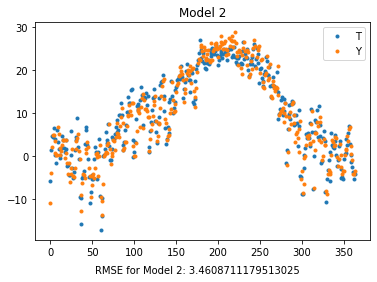

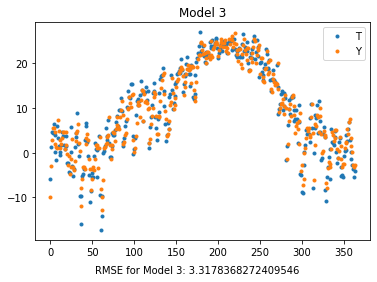

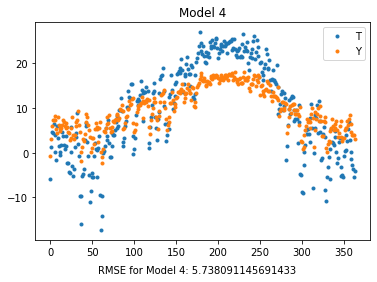

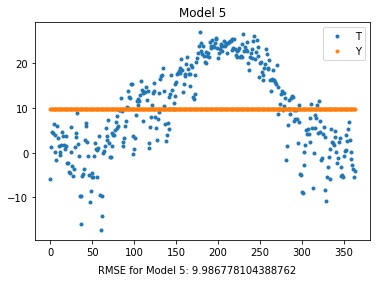

In [128]:
def makeplots(X, T, learning_rate, epochs, n):
    n += 1

    model_one = train(X, T, learning_rate, epochs)
    Y = use(X, model_one)
    rmse_num = rmse(Y, T)
    
    plt.figure()
    plt.title("Model " + str(n))
    plt.plot(T, '.', label='T')
    plt.plot(Y, '.', label='Y')
    plt.legend()
    plt.figtext(0.5, 0.01, "RMSE for Model " + str(n) + ": " + str(rmse_num), ha='center')
    
    model_array.append(model_one)

learning_rates = [0.1, 0.01, 0.0001, 0.00001, 0.0000001]
epochs = [1000, 500, 100, 50, 10]
model_array = []

for n in range(5) :
    makeplots(X, T, learning_rates[n], epochs[n], n) 
    

## Discussion

Through the 5 iterations of training the model, we can see the correlation of a higher RMSE having poor fits for the data. The data was best fit by a small learning rate and medium sized epoch. If the learning rate is too big, the model's iterations might miss the local maximum and not be able to converge. There is a balance between having a small learning rate and a medium to large number of epochs to be able to find the maximum. If there are too many epochs it can consume lots of computational power. The best combination for this model was having 100 epochs and a learning rate of 0.0001

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [129]:
num = 1
for n in model_array:
    weights = pandas.DataFrame(n['w'][1:], index=Xnames, columns=['weights'])
    print('Model',num)
    print(weights)
    print('\n')
    num+=1

Model 1
        weights
tave  -0.102263
tmax  -0.066197
tmin  -0.079847
vp     1.511733
rhmax -0.083439
rhmin -0.128257
pp     0.011244
gust  -0.182108


Model 2
        weights
tave   0.225846
tmax   0.213174
tmin   0.226047
vp     0.380356
rhmax -0.036357
rhmin -0.068001
pp     0.049329
gust  -0.114889


Model 3
        weights
tave   0.243157
tmax   0.232720
tmin   0.242229
vp     0.241495
rhmax -0.021520
rhmin -0.052613
pp     0.020622
gust  -0.095867


Model 4
        weights
tave   0.120852
tmax   0.117574
tmin   0.118103
vp     0.115812
rhmax -0.012923
rhmin -0.049032
pp    -0.005196
gust   0.005414


Model 5
        weights
tave   0.000340
tmax   0.000332
tmin   0.000331
vp     0.000322
rhmax -0.000044
rhmin -0.000148
pp    -0.000021
gust   0.000032




The weights in each model determined how well the data fit. The trend of model 3, which was the best model we had, was having 4 features with similar weights around .25. Model 1 had a very high weight for vp, which was an outsider for the other models. The other models had lower weight values that were generally less evenly distributed between features.

## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [55]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Avery-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

cs445 Execution Grade is 60 / 60

 __ / 5 Reading in weather.data correctly.

 __ / 5 Count missing value

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [130]:
df = df.to_numpy()
T = df[1:, 0:1] -  df[:-1, 0:1]


Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.

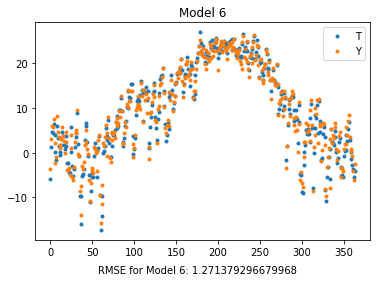

In [137]:
def makeplots(X, T, learning_rate, epochs, n):
    n += 1

    model_one = train(X, T, learning_rate, epochs)
    Y = use(X, model_one)
    Y = Y + df[1:, 0:1]
    rmse_num = rmse(Y, df[1:, 0:1])
    
    plt.figure()
    plt.title("Model " + str(n))
    plt.plot(df[1:, 0:1], '.', label='T')
    plt.plot(Y, '.', label='Y')
    plt.legend()
    plt.figtext(0.5, 0.01, "RMSE for Model " + str(n) + ": " + str(rmse_num), ha='center')
    
    model_array.append(model_one)

learning_rates = [0.1, 0.01, 0.0001, 0.00001, 0.0000001]
epochs = [1000, 500, 100, 50, 10]
model_array = []

makeplots(X, T, 0.0001, 100, 5)

# for n in range(5) :
#     makeplots(X, T, learning_rates[n], epochs[n], n) 
    